# Masterthesis - Plots

#### Imports

In [181]:
library(ggplot2)
library(dplyr)
library(tikzDevice)
library(viridis)

Loading required package: viridisLite



In [15]:
#detach("package:elasdics2d", unload=TRUE)
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Define theme

In [496]:
theme_thesis <- function(){ 
    theme_bw() %+replace%    #replace elements we want to change
    theme()
}

## 1. Introduction

In [16]:
library(elasticproc2d)
source("../scripts/load_datasets.R")

set.seed(18)
data_curves <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE)

knots <- seq(0, 1, length = 13)

In [17]:
mean1 <- compute_elastic_proc2d_mean(data_curves, knots = knots, type = "smooth", penalty = 2, pfit_method = "linear")
mean2 <- compute_elastic_proc2d_mean(data_curves, knots = knots, type = "smooth", penalty = 2, pfit_method = "smooth")

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

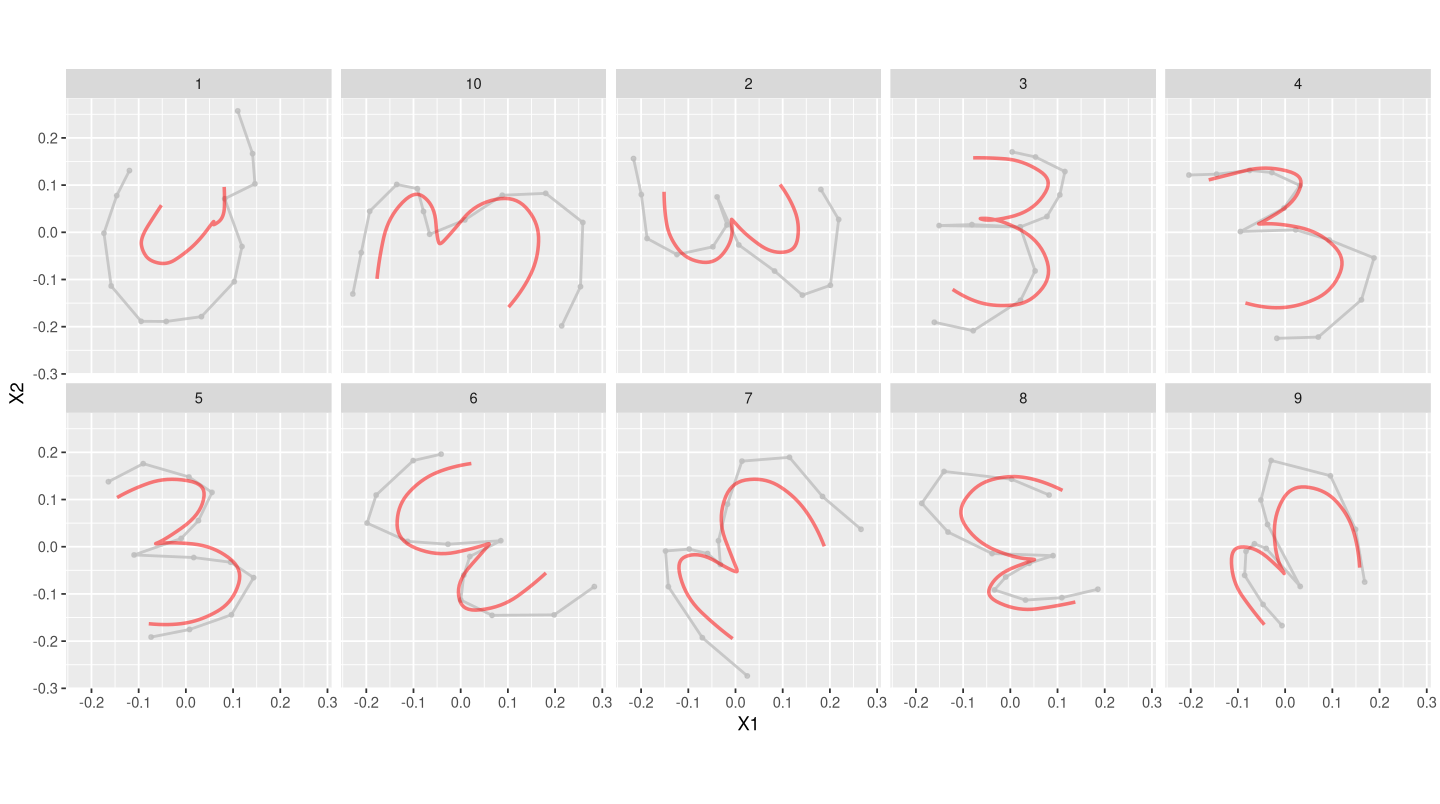

In [24]:
pfits.smooth <- lapply(seq_along(mean2$data_curves), function(j){
  knots <- mean2$knots
  type <- mean2$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean2$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})[seq(1,10)]

pfits <- lapply(seq_along(mean2$data_curves), function(j){
    center_curve(mean2$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves[[j]])
})[seq(1,10)]

#### Fig. 1.1: Same shape, different transformation.

png 
  2

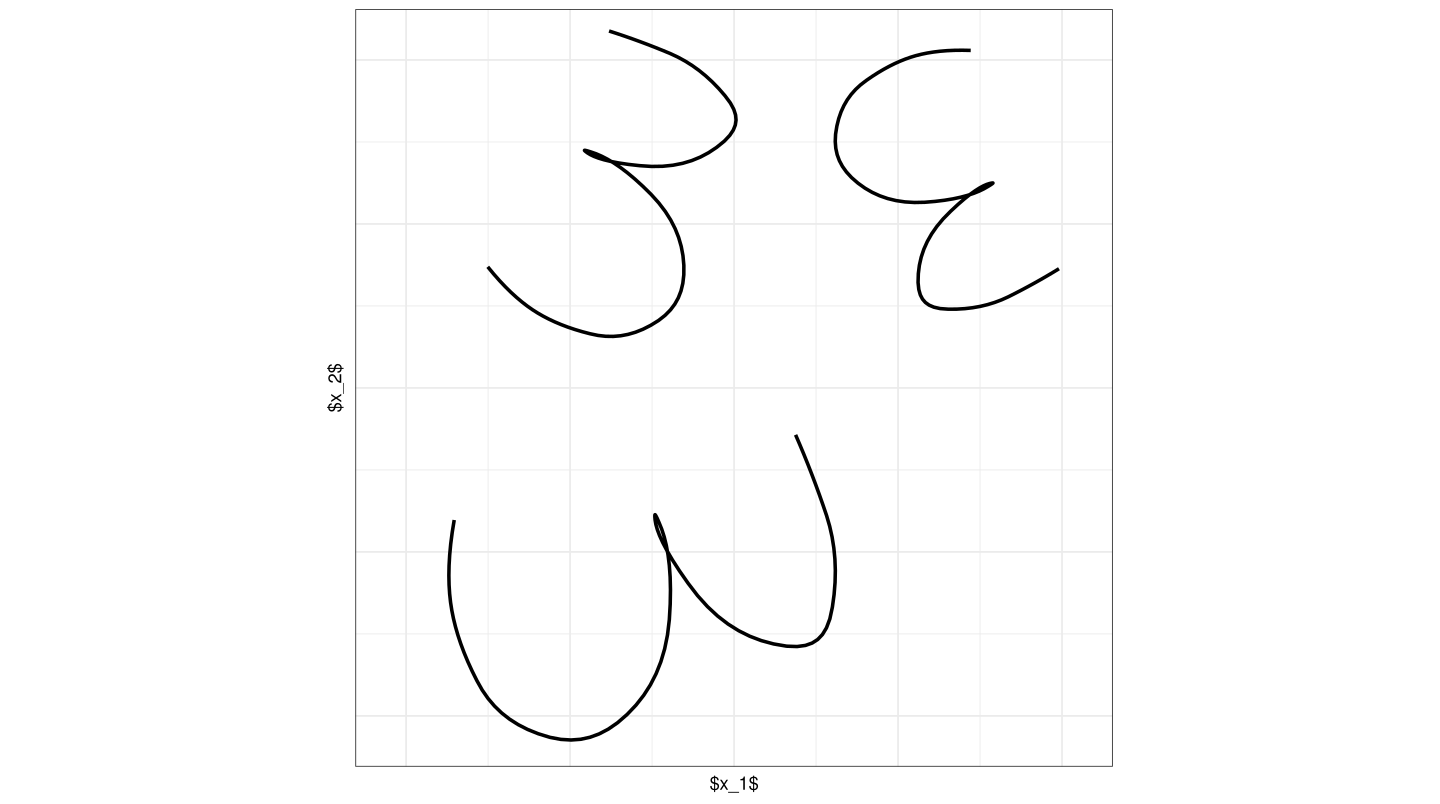

In [497]:
set.seed(4)

pfits.example <- lapply(seq_along(seq(3)), function(j){
    pfit <- pfits.smooth[[3]]
    pfit <- rand_rotate_curve2d(pfit)
    pfit <- rand_scale_curve2d(pfit)
    pfit$X1 <- pfit$X1 - 0.4*(runif(1) - 0.60)
    pfit$X2 <- pfit$X2 - 0.4*(runif(1) - 0.58)
    pfit
})

p.shape <- ggplot(bind_rows(pfits.example, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 1, color="black") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.21,0.21), ylim = c(-0.21, 0.21))

tikzDevice::tikz(file = "../tex/graphics/1-eucl.tex", width = 3, height = 3)
print(p.shape)
dev.off()
p.shape

png 
  2

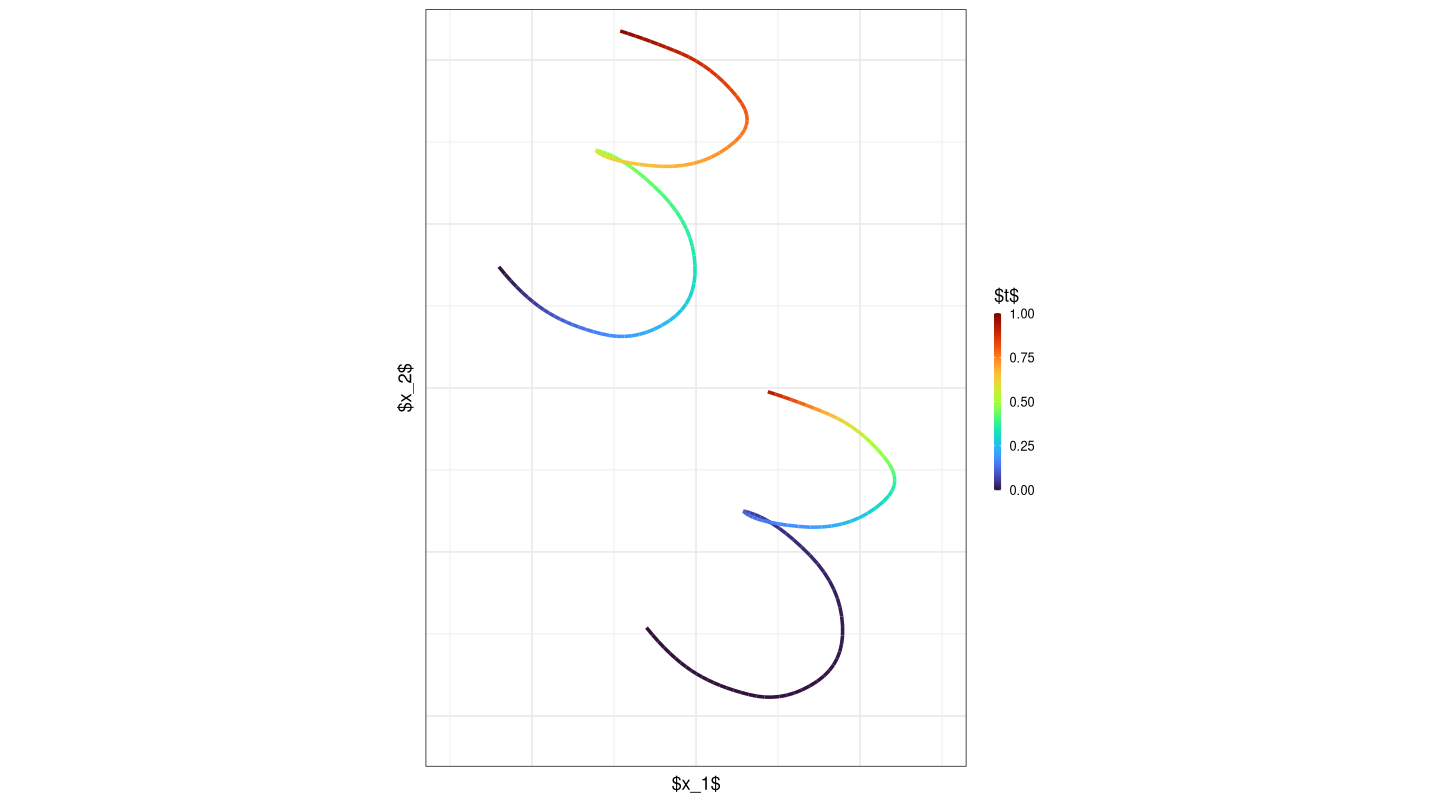

In [498]:
pfits.warp <- lapply(seq(2), function(j){
    pfit <- pfits.example[[3]]
    pfit$t <- seq(0, 1, length.out=length(pfit$X1))
    if(j == 1){pfit$X1 <- pfit$X1 + 0.03}
    if(j == 2){
        pfit$t <- pfit$t^4
        pfit$X1 <- pfit$X1 + 0.12
        pfit$X2 <- pfit$X2 - 0.22
    }
    pfit
})

p.warp <- ggplot(bind_rows(pfits.warp, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id, col=t), size = 1) +
    scale_color_viridis(option = "H") +
    labs(x = "$x_1$", y = "$x_2$", color="$t$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank(),
        legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.15, 'cm'),
        legend.text = element_text(size=rel(0.7))) +
    coord_fixed(xlim = c(-0.15,0.15), ylim = c(-0.21, 0.21))

tikzDevice::tikz(file = "../tex/graphics/1-warp.tex", width = 3, height = 3)
print(p.warp)
dev.off()
p.warp

#### Fig 1.2: Sparse and Dense Observations

png 
  2

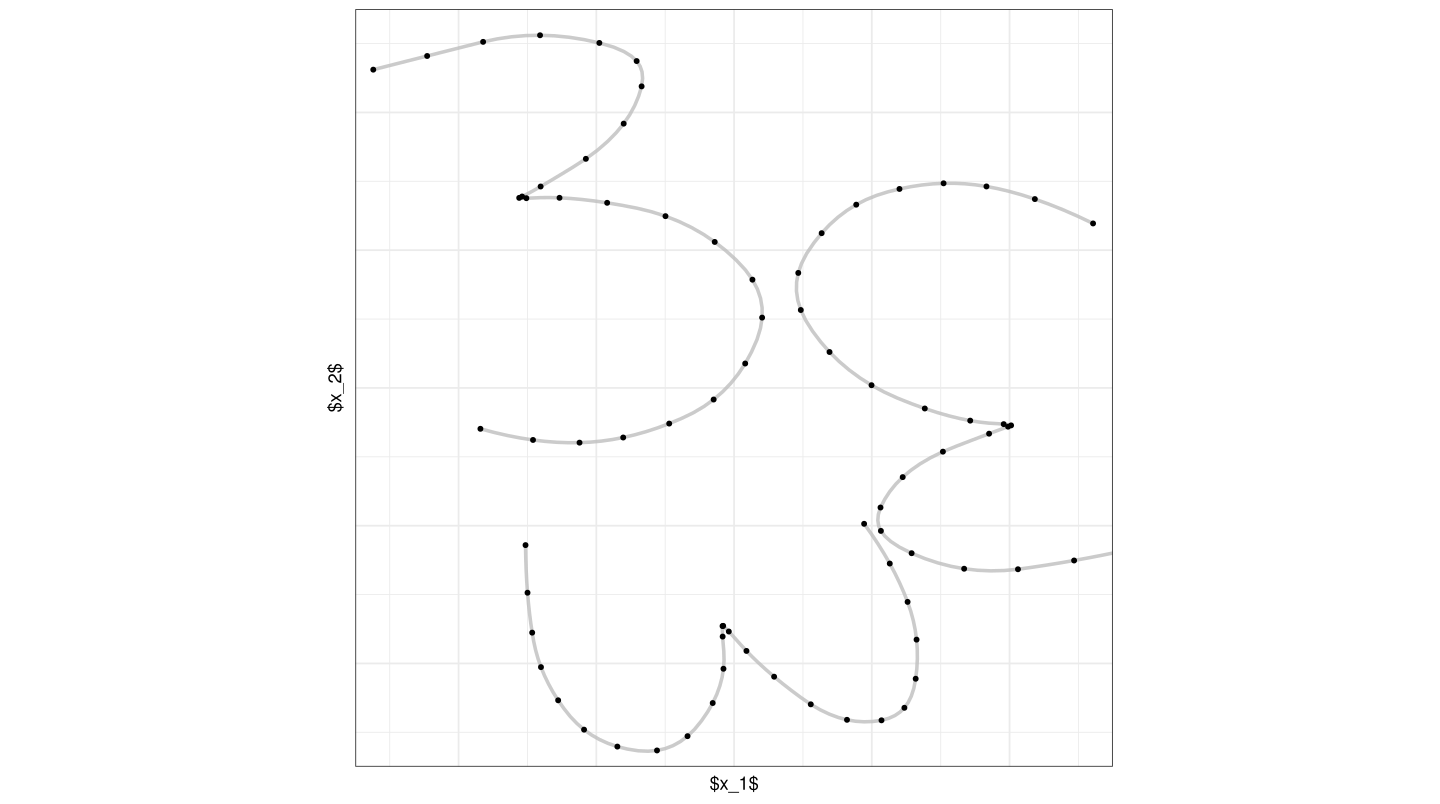

In [499]:
pfits.dense <- lapply(seq(3), function(j){
    pfit <- pfits.smooth[[j+1]]
    if(j == 1){
        pfit$X1 <- pfit$X1
        pfit$X2 <- pfit$X2 - 0.2
    }
    if(j == 2){
        pfit <- pfits.smooth[[8]]
        pfit$X1 <- pfit$X1 + 0.15
        pfit$X2 <- pfit$X2 + 0.00
    }
    if(j == 3){
        pfit$X1 <- pfit$X1 - 0.10
        pfit$X2 <- pfit$X2 + 0.12
    }
    pfit$t <- seq(0, 1, length.out=length(pfit$X1))
    pfit
})
pfits.dense4 <- lapply(seq(3), function(j){
    pfit <- pfits.dense[[j]]
    pfit %>% slice(which(row_number() %% 4 == 1))
})

p.dense <- ggplot(bind_rows(pfits.dense4, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data = bind_rows(pfits.dense, .id="id"), aes(group=id), size = 1, color="grey", alpha=0.8) +
    geom_point(size = 1, color = "black") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.25,0.25), ylim = c(-0.25, 0.25))

tikzDevice::tikz(file = "../tex/graphics/1-dense.tex", width = 3, height = 3)
print(p.dense)
dev.off()
p.dense

png 
  2

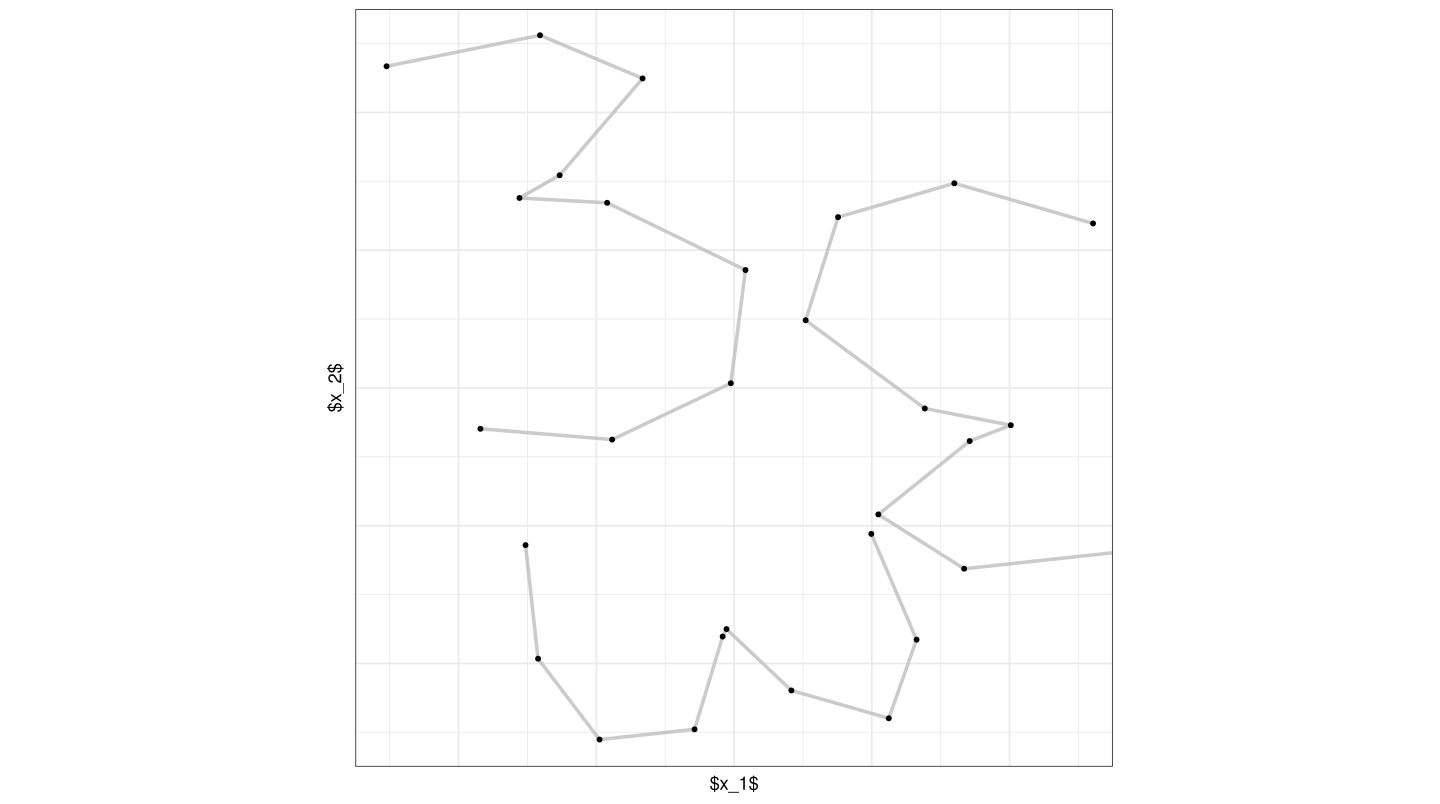

In [500]:
pfits.sparse <- lapply(seq(3), function(j){
    pfit <- pfits.dense[[j]]
    pfit %>% slice(which(row_number() %% 11 == 1))
})

p.sparse <- ggplot(bind_rows(pfits.sparse, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 1, color="grey", alpha=0.8) +
    geom_point(size = 1, color = "black") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed(xlim = c(-0.25,0.25), ylim = c(-0.25, 0.25))

tikzDevice::tikz(file = "../tex/graphics/1-sparse.tex", width = 3, height = 3)
print(p.sparse)
dev.off()
p.sparse

#### Fig. 1.3: Mean estimation from Sparse and Irregular Planar Curves.

Warning message:
“Removed 52 row(s) containing missing values (geom_path).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 52 row(s) containing missing values (geom_path).”
Warning message:
“Removed 52 rows containing missing values (geom_point).”


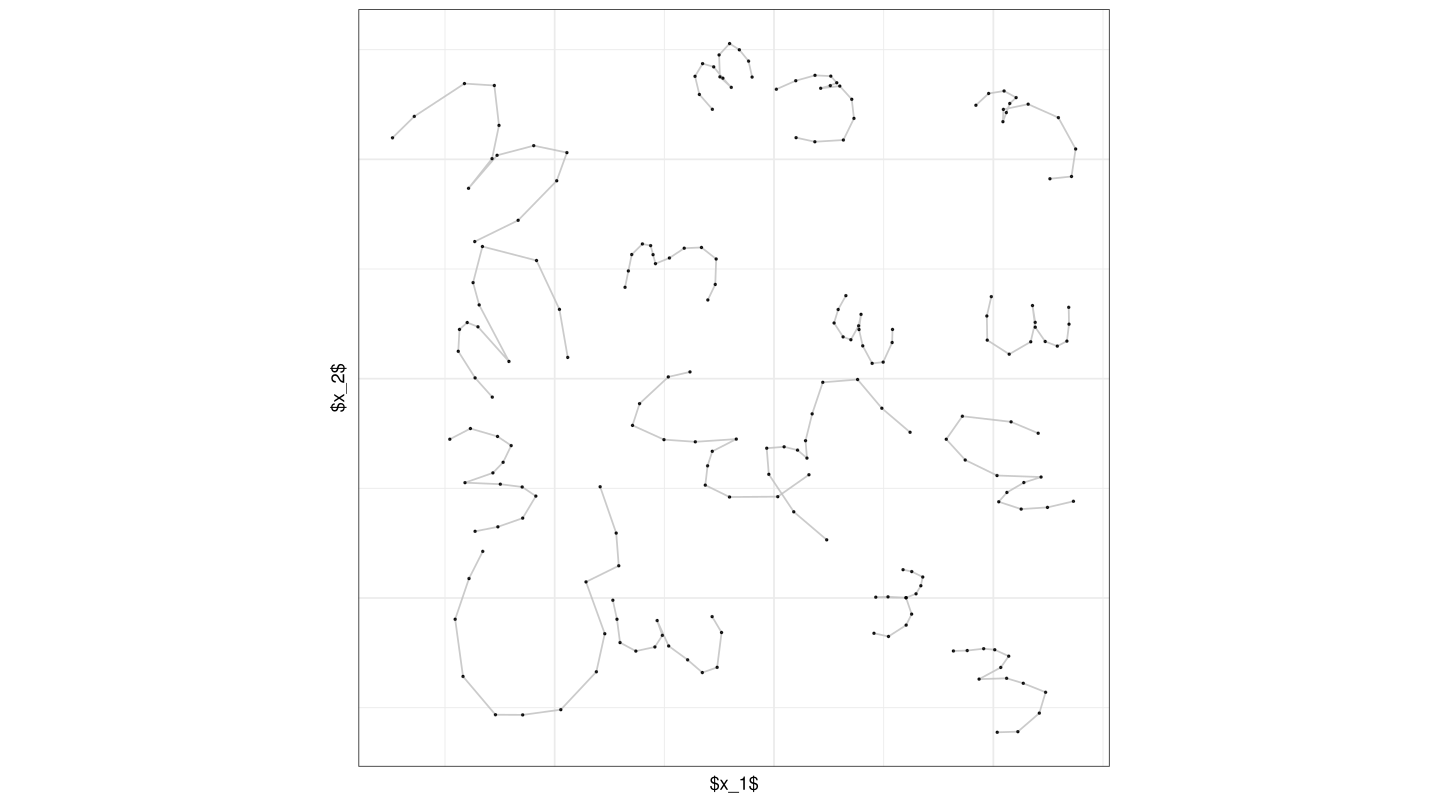

In [501]:
set.seed(20)
grid.x <- seq(-60,+60, length=4)
grid.y <- seq(-60,+60, length=4)
grid.xy <- expand.grid(grid.x,grid.y)
data.plot <- lapply(seq(20), function(j){
    curve <- data_curves[[j]]
    curve$X1 <- curve$X1 - mean(curve$X1)
    curve$X2 <- curve$X2 - mean(curve$X2)
    curve$X1 <- curve$X1 + grid.xy$Var1[j] +  20*(runif(1) - 0.5)
    curve$X2 <- curve$X2 + grid.xy$Var2[j] +  20*(runif(1) - 0.5)
    curve
})

p.obs <- ggplot(bind_rows(data.plot, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 0.5, color="grey", alpha=0.8) +
    geom_point(size = 0.3, color = "black", alpha=0.8) +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed()

tikzDevice::tikz(file = "../tex/graphics/1-obs.tex", width = 3, height = 3)
print(p.obs)
dev.off()
p.obs

png 
  2

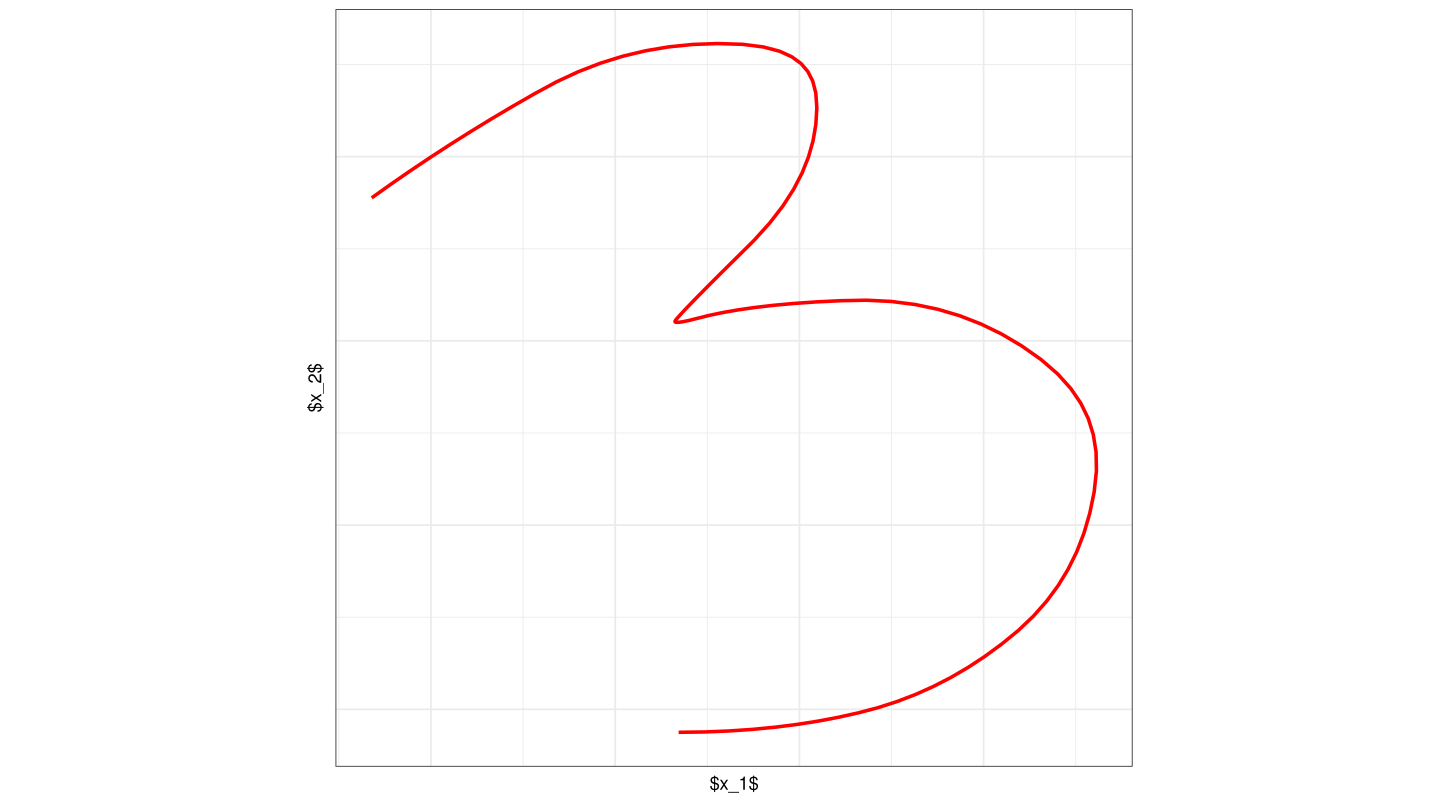

In [502]:
theta <- 0
mat <- matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), nrow = 2, ncol = 2)
mean.rot <- as.matrix(get_evals(mean1)) %*% t(mat)
mean.rot <- as.data.frame(mean.rot)
colnames(mean.rot) <- c("X1", "X2")

p.mean <- ggplot(mean.rot, aes(x=X1, y=X2)) + 
    geom_path(size = 1, color="red") +
    labs(x = "$x_1$", y = "$x_2$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
            axis.text.x = element_blank(), axis.text.y = element_blank()) +
    coord_fixed()

tikzDevice::tikz(file = "../tex/graphics/1-mean.tex", width = 3, height = 3)
print(p.mean)
dev.off()
p.mean

## 2. Elastic Full Procrustes Means for Planar Curves

#### Fig. 2.1: Curve Example

png 
  2

png 
  2

png 
  2

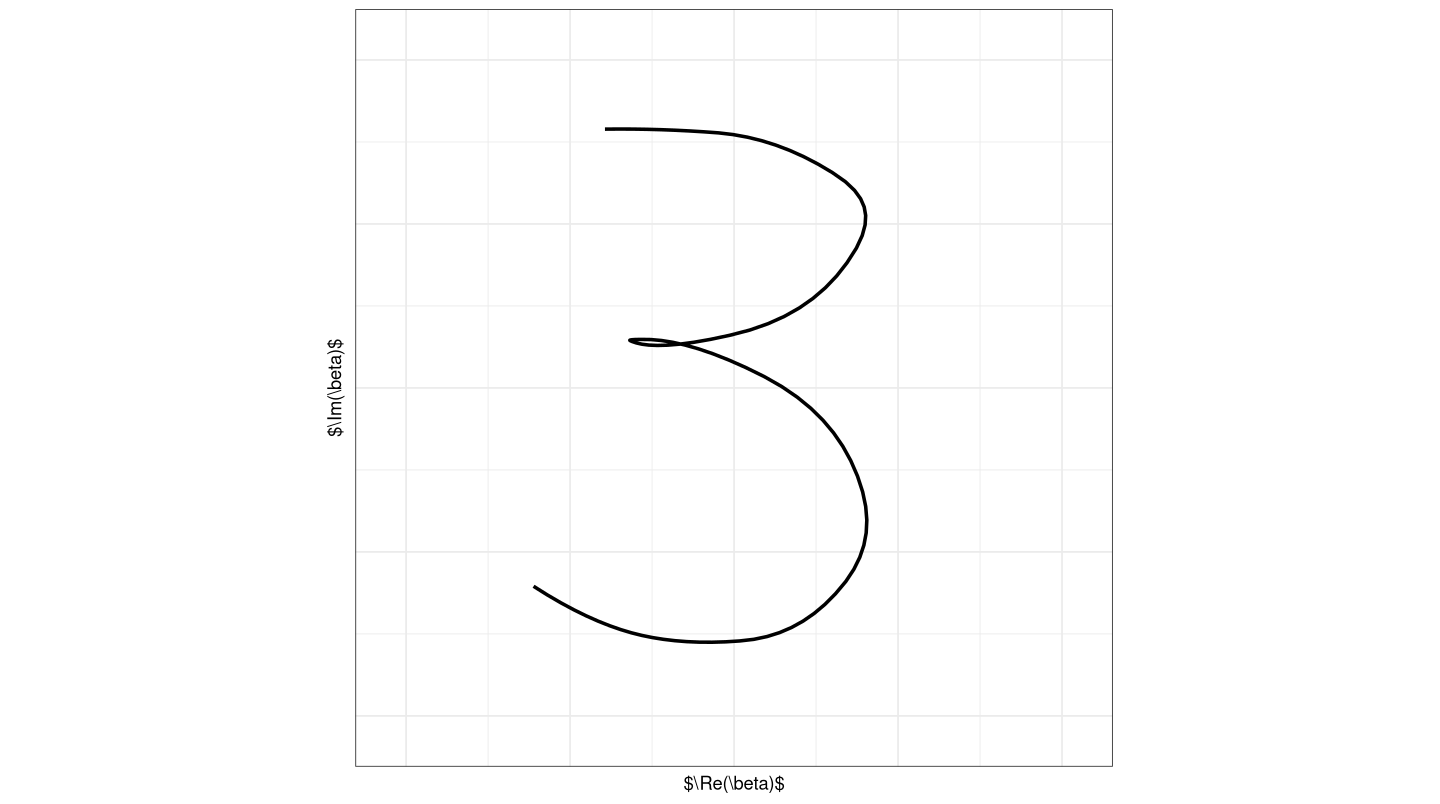

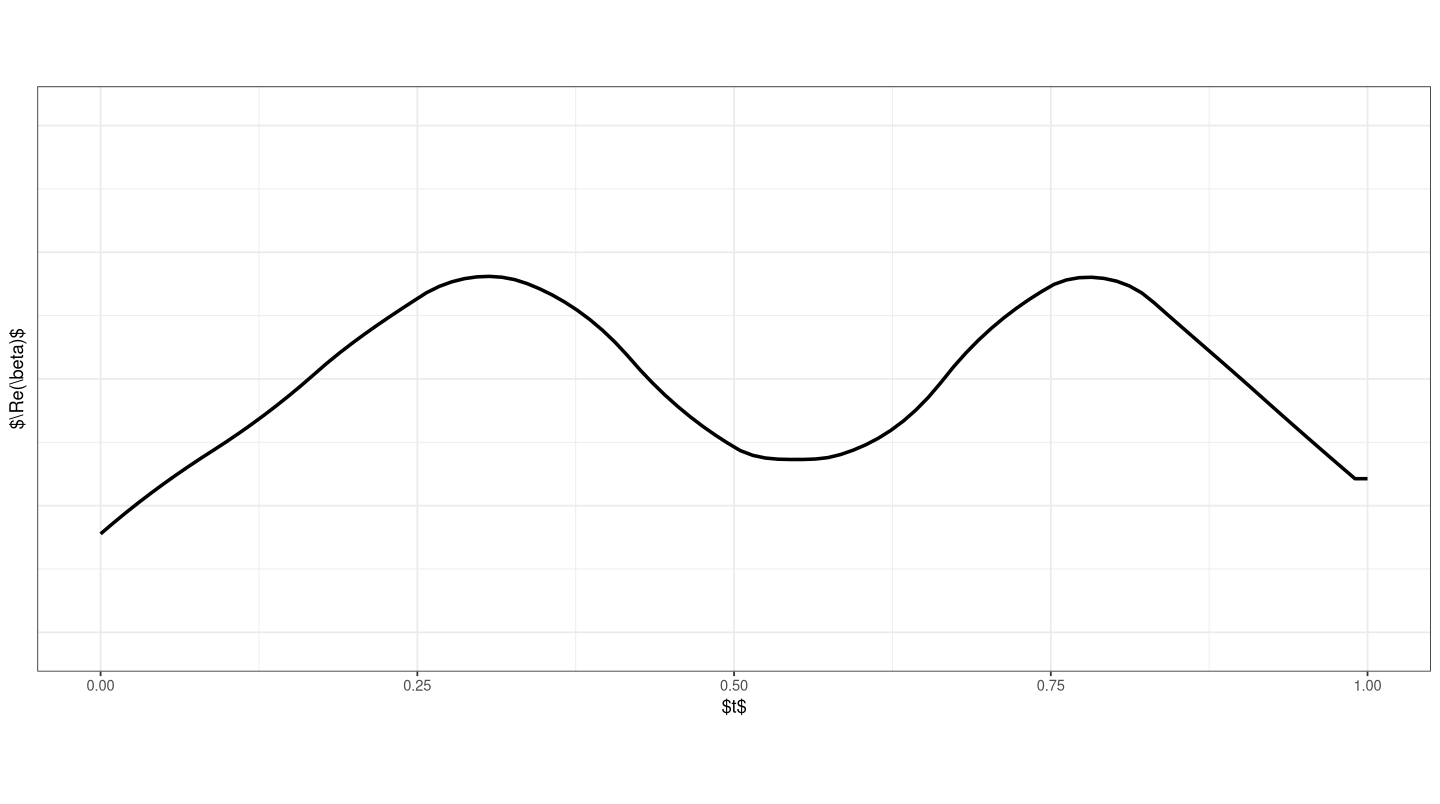

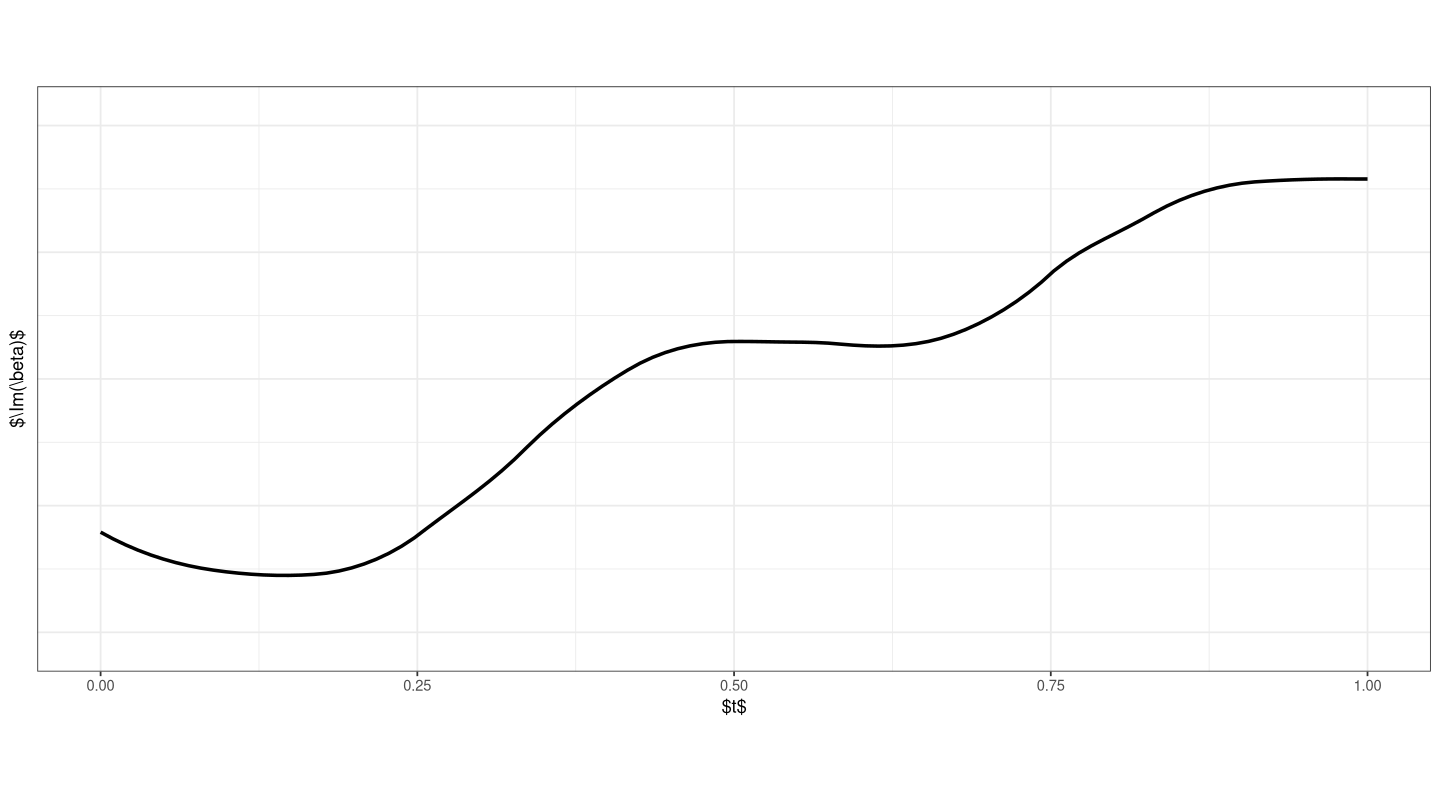

In [522]:
pfit <- pfits.smooth[[3]]
pfit$t <- seq(0, 1, length.out=length(pfit$X1))

p.curve <- ggplot(pfit, aes(x=X1, y=X2)) + 
    geom_path(size = 1) +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    coord_fixed(xlim = c(-0.21,0.21), ylim = c(-0.21, 0.21)) + 
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
        axis.text.x = element_blank(), axis.text.y = element_blank())

p.curveX <- ggplot(pfit, aes(x=t, y=X1)) + 
    geom_path(size = 1) +
    labs(x = "$t$", y = "$\\Re(\\beta)$") +
    theme_thesis() +
    coord_fixed(xlim = c(0,1), ylim = c(-0.21, 0.21)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

p.curveY <- ggplot(pfit, aes(x=t, y=X2)) + 
    geom_path(size = 1) +
    labs(x = "$t$", y = "$\\Im(\\beta)$") +
    theme_thesis() +
    coord_fixed(xlim = c(0,1), ylim = c(-0.21, 0.21)) + 
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank())

tikzDevice::tikz(file = "../tex/graphics/2-curve.tex", width = 3, height = 3)
print(p.curve)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-curveX.tex", width = 3, height = 1.4)
print(p.curveX)
dev.off()
tikzDevice::tikz(file = "../tex/graphics/2-curveY.tex", width = 3, height = 1.4)
print(p.curveY)
dev.off()

plot(p.curve)
plot(p.curveX)
plot(p.curveY)

#### Fig. 2.2: SRV Example

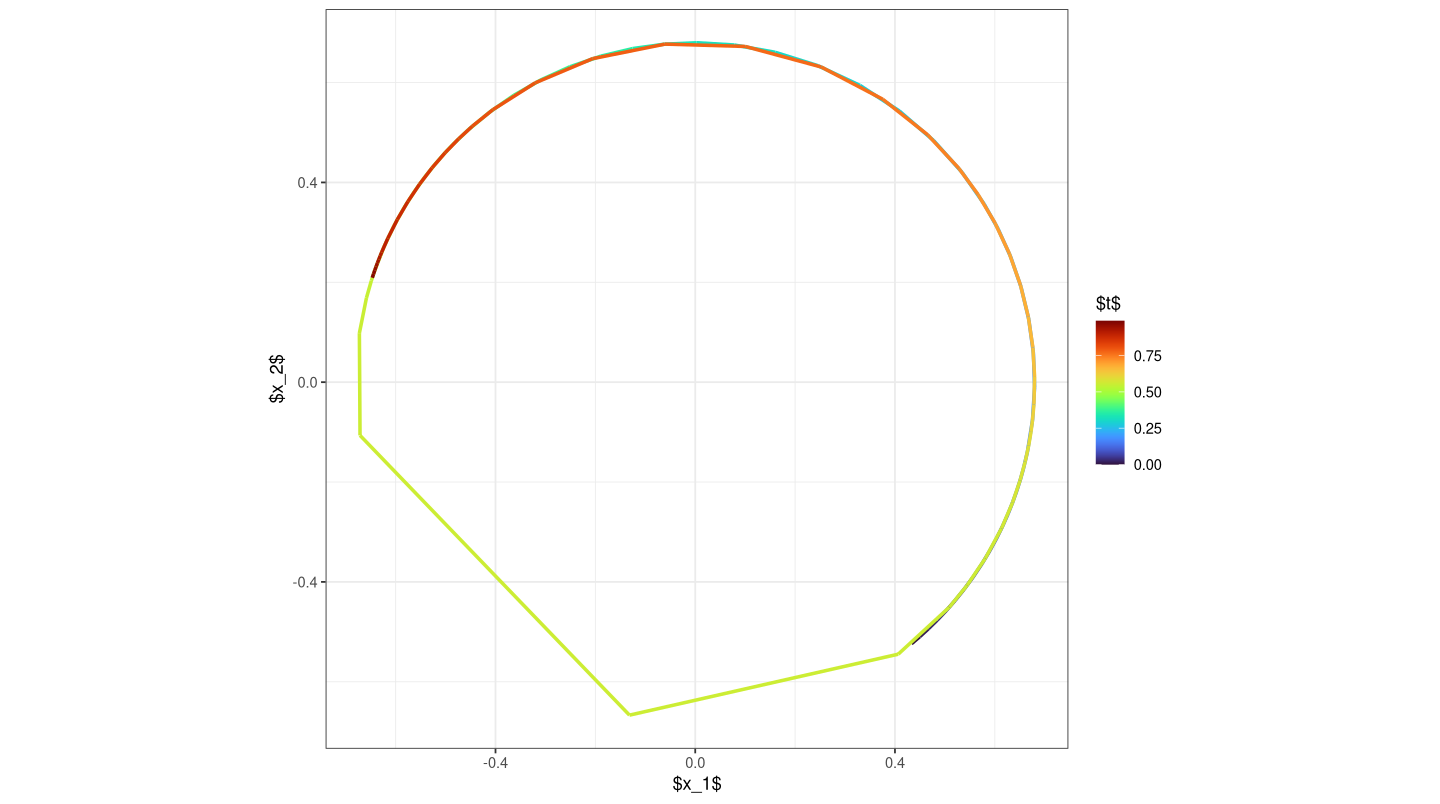

In [503]:
srvs.warp <- lapply(seq(2), function(j){
    pfit <- pfits.example[[3]]
    pfit$t <- elasdics::get_arc_length_param(pfits.example[[3]])
    pfit <- head(pfit, -1)
    if(j == 1){pfit$X1 <- pfit$X1 + 0.03}
    if(j == 2){
        pfit$t <- pfit$t^4
        pfit$X1 <- pfit$X1 + 0.12
        pfit$X2 <- pfit$X2 - 0.22
    }
    srv <- elasdics::get_srv_from_points(pfit)
    srv
})

p.srv1 <- ggplot(srvs.warp[[1]], aes(x=X1, y=X2)) + 
    geom_path(aes(col=t), size = 1) +
    scale_color_viridis(option = "H") +
    labs(x = "$x_1$", y = "$x_2$", color="$t$") +
    theme_thesis() +
    coord_fixed()
    #theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
    #    axis.text.x = element_blank(), axis.text.y = element_blank(),
    #    legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.15, 'cm'),
    #    legend.text = element_text(size=rel(0.7))) +
    #coord_fixed(xlim = c(-0.15,0.15), ylim = c(-0.21, 0.21))

plot(p.srv1)

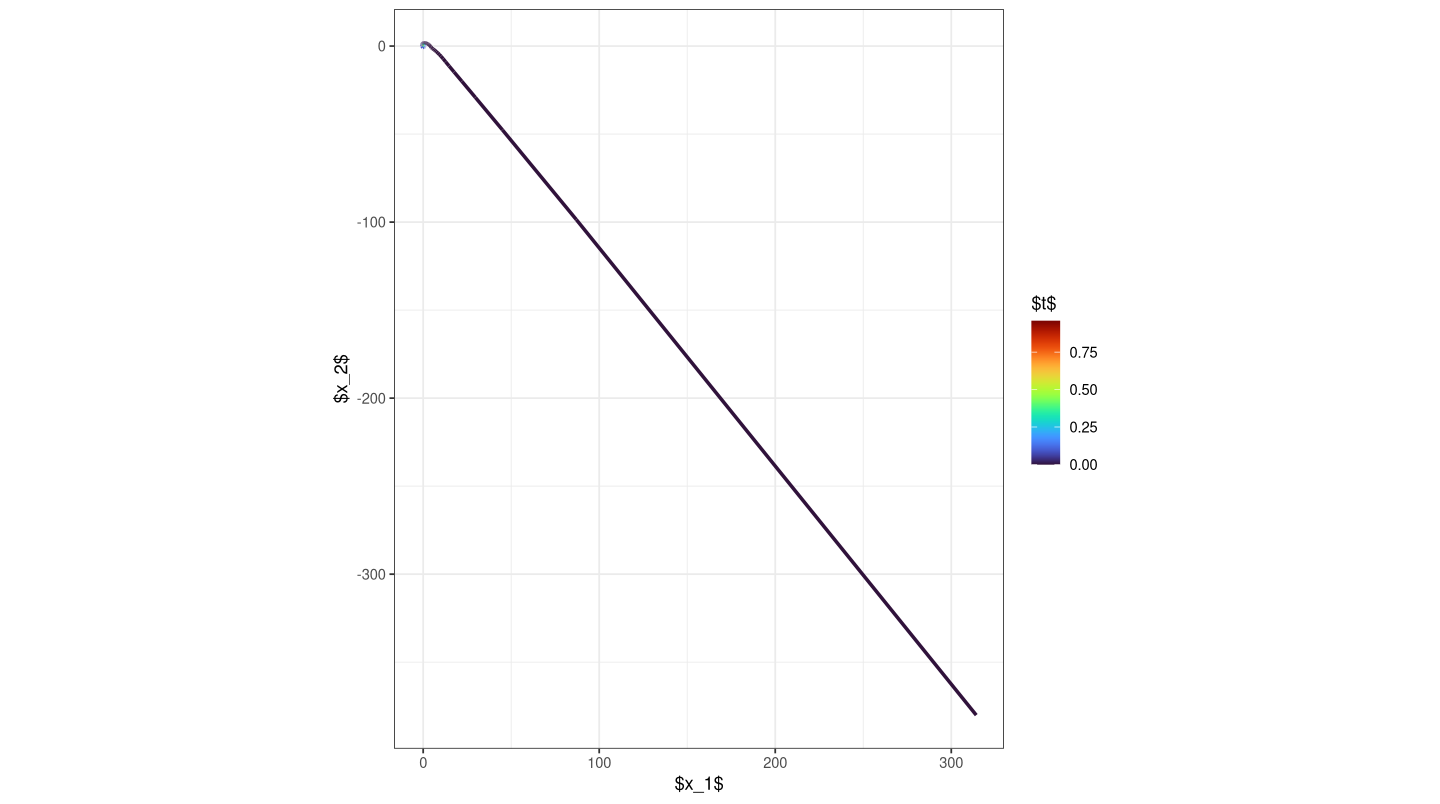

In [504]:
p.srv2 <- ggplot(srvs.warp[[2]], aes(x=X1, y=X2)) + 
    geom_path(aes(col=t), size = 1) +
    scale_color_viridis(option = "H") +
    labs(x = "$x_1$", y = "$x_2$", color="$t$") +
    theme_thesis() +
    coord_fixed()
    #theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
    #    axis.text.x = element_blank(), axis.text.y = element_blank(),
    #    legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.15, 'cm'),
    #    legend.text = element_text(size=rel(0.7))) +
    #coord_fixed(xlim = c(-0.15,0.15), ylim = c(-0.21, 0.21))

plot(p.srv2)

In [479]:
srvs.warp[[2]]

,t,X1,X2
,<dbl>,<dbl>,<dbl>
2,0.000000e+00,314.186757,-380.08277524
3,2.353337e-08,86.969784,-98.54728555
4,3.363879e-07,45.044444,-47.65261229
5,1.524186e-06,29.625108,-29.15231596
6,4.320458e-06,22.000850,-20.05379128
7,9.482523e-06,17.568716,-14.76205568
8,1.772307e-05,14.713845,-11.33326225
9,2.968082e-05,12.737890,-8.93514905
10,4.591780e-05,11.293727,-7.15872781
